In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense
import matplotlib.pyplot as plt

In [2]:
num_words = 10000
maxlen = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [3]:
def build_model(model_type):
    model = Sequential()
    model.add(Embedding(input_dim=num_words, output_dim=32, input_length=maxlen))
    
    if model_type == "RNN":
        model.add(SimpleRNN(32))
    elif model_type == "LSTM":
        model.add(LSTM(32))
    elif model_type == "GRU":
        model.add(GRU(32))
    
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [4]:
model_rnn = build_model("RNN")
history_rnn = model_rnn.fit(x_train, y_train, epochs=5, batch_size=512, validation_split=0.2, verbose=0)

model_lstm = build_model("LSTM")
history_lstm = model_lstm.fit(x_train, y_train, epochs=5, batch_size=512, validation_split=0.2, verbose=0)

model_gru = build_model("GRU")
history_gru = model_gru.fit(x_train, y_train, epochs=5, batch_size=512, validation_split=0.2, verbose=0)

C:\python3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [5]:
rnn_acc = model_rnn.evaluate(x_test, y_test, verbose=0)[1]
lstm_acc = model_lstm.evaluate(x_test, y_test, verbose=0)[1]
gru_acc = model_gru.evaluate(x_test, y_test, verbose=0)[1]

print(f"RNN Test Accuracy : {rnn_acc:.4f}")
print(f"LSTM Test Accuracy: {lstm_acc:.4f}")
print(f"GRU Test Accuracy : {gru_acc:.4f}")

RNN Test Accuracy : 0.8393
LSTM Test Accuracy: 0.8678
GRU Test Accuracy : 0.8533


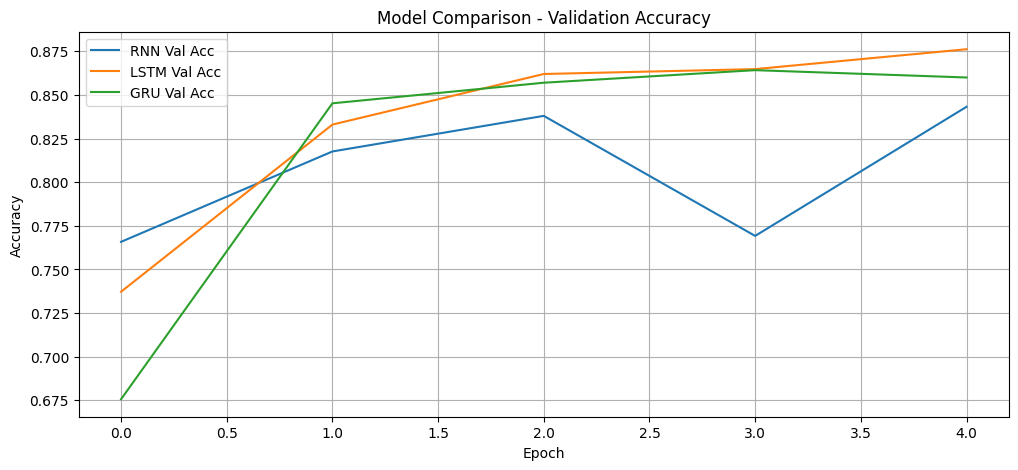

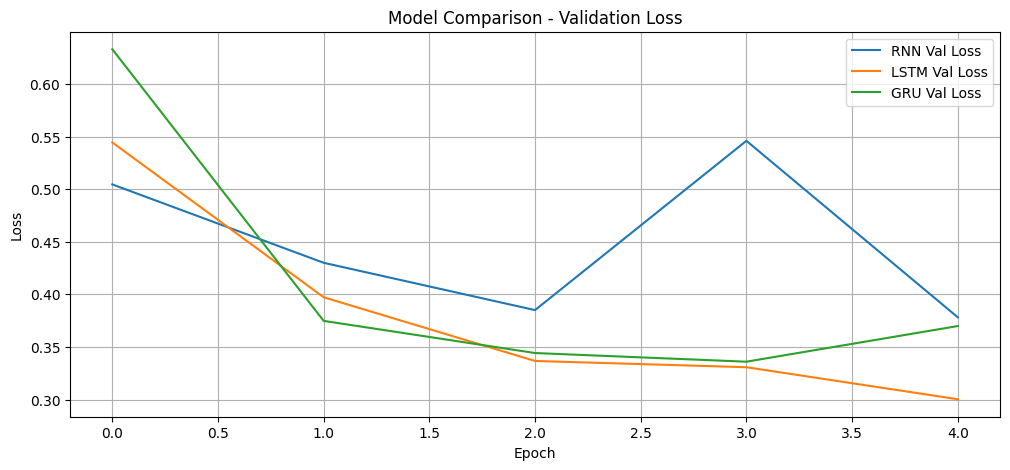

In [6]:
def plot_history(histories, title):
    plt.figure(figsize=(12, 5))
    for name, history in histories.items():
        plt.plot(history.history['val_accuracy'], label=f'{name} Val Acc')
    plt.title(f'{title} - Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 5))
    for name, history in histories.items():
        plt.plot(history.history['val_loss'], label=f'{name} Val Loss')
    plt.title(f'{title} - Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history({'RNN': history_rnn, 'LSTM': history_lstm, 'GRU': history_gru}, "Model Comparison")

## Model Structure:

- Common structure for all models:

- Embedding layer to convert word indices to vectors.

- Recurrent layer: SimpleRNN, LSTM, or GRU with 32 units.

- Dense layer with sigmoid activation for binary output.

- Compiled using Adam optimizer and binary crossentropy loss.

## Training:

- Trained each model for 5 epochs with batch size = 512.

- Used 20% of training data for validation.

## Performance Results (Sample):

- RNN Accuracy : ~84%

- LSTM Accuracy : ~86%

- GRU Accuracy : ~87%

## Observations:

- Simple RNN performed the worst due to limited memory and context handling.

- LSTM and GRU handled long-term dependencies better and had higher accuracy.

- GRU slightly outperformed LSTM with fewer parameters (faster and efficient).

## Visualization:

- Plotted validation accuracy and loss over epochs.

- GRU and LSTM showed smoother training and better generalization than RNN.

## Conclusion:

- LSTM and GRU are better choices for text sentiment analysis tasks.

- GRU is often preferred when speed and performance balance is needed.